# **Term Deposit Prediction**

## Machine Learning Predicition


In this assignment, we aim to predict if a customer will subscribe to a term deposit. This prediction is crucial for optimizing marketing strategies, focusing on potential subscribers, and making efficient resource allocations.

## Objectives

Perform exploratory Data Analysis and determine Training Labels

- Standardize the data
- Split into training data and test data
- Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
- Find the method performs best using test data

<hr>

## Import Libraries and Define Auxiliary Functions


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from scipy import stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

## Load the dataframe

In [35]:
# Load the data from the 'bank-full2.csv' file using pandas read_csv function
X = pd.read_csv("bank-full2.csv")
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
X.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [37]:
# Load the data from the 'bank-full.csv' file using pandas read_csv function
data = pd.read_csv("bank-full.csv", sep=';')

# Extract the 'y' column (target variable) as a separate DataFrame 'y'
y = data[['y']]

# Convert 'yes' and 'no' to 1 and 0 in the 'y' column
y['y'] = y['y'].map({'yes': 1, 'no': 0})

# Convert 'y' DataFrame to a numpy array
y_numpy = y['y'].values

# Print the resulting numpy array
print(y_numpy)

[0 0 0 ... 1 0 0]


C:\Users\PC\AppData\Local\Temp\ipykernel_14024\2180486564.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['y'] = y['y'].map({'yes': 1, 'no': 0})


Standardize the data in X then reassign it to the variable X using the transform provided below.

In [38]:
# Instantiate a StandardScaler object for feature scaling
transform = preprocessing.StandardScaler()

# Apply the StandardScaler to the features in the DataFrame 'X'
# This step scales the features to have zero mean and unit variance
X = transform.fit_transform(X)

# Display the resulting scaled features in the DataFrame 'X'
print(X)

[[ 1.60696496  0.25641925 -1.29847633 ... -0.20597248 -0.185948
   0.47251925]
 [ 0.28852927 -0.43789469 -1.29847633 ... -0.20597248 -0.185948
   0.47251925]
 [-0.74738448 -0.44676247 -1.29847633 ... -0.20597248 -0.185948
   0.47251925]
 ...
 [ 2.92540065  1.42959305  0.14341818 ... -0.20597248  5.37784754
  -2.11631591]
 [ 1.51279098 -0.22802402  0.14341818 ... -0.20597248 -0.185948
   0.47251925]
 [-0.37068857  0.52836436  0.14341818 ...  4.85501757 -0.185948
  -2.11631591]]


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.3 and random_state to 7. The training data and test data should be assigned to the following labels

<code>X_train, X_test, Y_train, Y_test</code>


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (31647, 48)
y train data (31647, 1)
x test data  (13564, 48)
y test data  (13564, 1)


## Comparing base models

Explore the performance of fundamental classification algorithms—'Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Gaussian Naive Bayes', and 'Support Vector Machine (SVM)' using metrics such as 'Accuracy', 'Precision', 'Recall', 'F1 Score', and confusion matrices.

In [40]:
# Create a KFold object with 10 folds for cross-validation
kfold = model_selection.KFold(n_splits=10)

We utilize k-fold cross-validation to ensure robust and unbiased model evaluation.

### 1. Logistic Regression

In [41]:
# Logistic Regression model
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(X_train, y_train.values.ravel())

# Predictions on the test set
LogReg_y_pred = LogReg.predict(X_test)
LogReg_Score = LogReg.score(X_test, y_test)


In [42]:
# Evaluation metrics
LogReg_ScoreAccuracy = accuracy_score(y_test, LogReg_y_pred)
LogReg_PrecisionScore = precision_score(y_test, LogReg_y_pred)
LogReg_RecallScore = recall_score(y_test, LogReg_y_pred)
LogReg_F1 = f1_score(y_test, LogReg_y_pred)

# Cross-validation results
cross_validation_result = model_selection.cross_val_score(LogReg, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

# Create a DataFrame for the results
base_model_results = pd.DataFrame(
    [['Logistic Regression', LogReg_ScoreAccuracy, LogReg_PrecisionScore,
      LogReg_RecallScore, LogReg_F1, cross_validation_result.mean(), cross_validation_result.std()]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation']
)

# Display classification report
print('\nLogistic Regression Classification Report:\n', metrics.classification_report(y_test, LogReg_y_pred))
print(f'Training set score: {LogReg.score(X_train, y_train)}')
print(f'Test set score: {LogReg.score(X_test, y_test)}')


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.64      0.35      0.46      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564

Training set score: 0.9003697032894113
Test set score: 0.904379239162489


### 2. K-Nearest Neighbors 

In [43]:
# K-Nearest Neighbors model
Knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', metric='euclidean')
Knn.fit(X_train, y_train.values.ravel())

# Predictions on the test set
Knn_y_pred = Knn.predict(X_test)
Knn_Score = Knn.score(X_test, y_test)


In [44]:
# Evaluation metrics
Knn_ScoreAccuracy = accuracy_score(y_test, Knn_y_pred)
Knn_PrecisionScore = precision_score(y_test, Knn_y_pred)
Knn_RecallScore = recall_score(y_test, Knn_y_pred)
Knn_F1 = f1_score(y_test, Knn_y_pred)

# Cross-validation results
cross_validation_result = model_selection.cross_val_score(Knn, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

# Create a DataFrame for the results and append it to the existing base_model_results
knn_models_results = pd.DataFrame(
    [['K-Nearest Neighbors', Knn_ScoreAccuracy, Knn_PrecisionScore,
      Knn_RecallScore, Knn_F1, cross_validation_result.mean(), cross_validation_result.std()]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation']
)

base_model_results = pd.concat([base_model_results, knn_models_results], ignore_index=True)

# Display classification report
print('\nK-Nearest Neighbors (K-NN) Classification Report:\n', metrics.classification_report(y_test, Knn_y_pred))
print(f'Training set score: {Knn.score(X_train, y_train)}')
print(f'Test set score: {Knn.score(X_test, y_test)}')


K-Nearest Neighbors (K-NN) Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12030
           1       0.58      0.27      0.37      1534

    accuracy                           0.90     13564
   macro avg       0.75      0.62      0.65     13564
weighted avg       0.88      0.90      0.88     13564

Training set score: 0.9060574462034316
Test set score: 0.895532291359481


### 3. SVM

In [45]:
# Support Vector Machine (SVM) model with Radial Basis Function (RBF) kernel
Svm = SVC(random_state=0, kernel='rbf', probability=True)
Svm.fit(X_train, y_train.values.ravel())

# Predictions on the test set
Svm_y_pred = Svm.predict(X_test)
Svm_Score = Svm.score(X_test, y_test)


In [46]:
# Evaluation metrics
Svm_ScoreAccuracy = accuracy_score(y_test, Svm_y_pred)
Svm_PrecisionScore = precision_score(y_test, Svm_y_pred)
Svm_RecallScore = recall_score(y_test, Svm_y_pred)
Svm_F1 = f1_score(y_test, Svm_y_pred)

# Cross-validation results
cross_validation_result = model_selection.cross_val_score(Svm, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

# Create a DataFrame for the results and append it to the existing base_model_results
svm_models_results = pd.DataFrame(
    [['SVM (RBF)', Svm_ScoreAccuracy, Svm_PrecisionScore,
      Svm_RecallScore, Svm_F1, cross_validation_result.mean(), cross_validation_result.std()]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation']
)
base_model_results = pd.concat([base_model_results, svm_models_results], ignore_index=True)

# Display classification report
print('\nSVM (RBF) Classification Report:\n', metrics.classification_report(y_test, Svm_y_pred))
print(f'Training set score: {Svm.score(X_train, y_train)}')
print(f'Test set score: {Svm.score(X_test, y_test)}')


SVM (RBF) Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12030
           1       0.65      0.31      0.42      1534

    accuracy                           0.90     13564
   macro avg       0.79      0.65      0.69     13564
weighted avg       0.89      0.90      0.89     13564

Training set score: 0.915379024868076
Test set score: 0.9035682689472132


### 4. Naive Bayes

In [47]:
# Gaussian Naive Bayes (GNB) model
GNB = GaussianNB()
GNB.fit(X_train, y_train.values.ravel())

# Predictions on the test set
GNB_y_pred = GNB.predict(X_test)
GNB_Score = GNB.score(X_test, y_test)


In [48]:
# Evaluation metrics
GNB_ScoreAccuracy = accuracy_score(y_test, GNB_y_pred)
GNB_PrecisionScore = precision_score(y_test, GNB_y_pred)
GNB_RecallScore = recall_score(y_test, GNB_y_pred)
GNB_F1 = f1_score(y_test, GNB_y_pred)

# Cross-validation results
cross_validation_result = model_selection.cross_val_score(GNB, X_train, y_train.values.ravel(), cv=kfold, scoring='accuracy')

# Create a DataFrame for the results and append it to the existing base_model_results
GNB_models_results = pd.DataFrame(
    [['Naive Bayes (Gaussian)', GNB_ScoreAccuracy, GNB_PrecisionScore,
      GNB_RecallScore, GNB_F1, cross_validation_result.mean(), cross_validation_result.std()]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation']
)
base_model_results = pd.concat([base_model_results, GNB_models_results], ignore_index=True)

# Display classification report
print('\nGaussian Naive Bayes (GNB) Classification Report:\n', metrics.classification_report(y_test, GNB_y_pred))
print(f'Training set score: {GNB.score(X_train, y_train)}')
print(f'Test set score: {GNB.score(X_test, y_test)}')


Gaussian Naive Bayes (GNB) Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     12030
           1       0.40      0.51      0.45      1534

    accuracy                           0.86     13564
   macro avg       0.67      0.71      0.69     13564
weighted avg       0.88      0.86      0.87     13564

Training set score: 0.8583120042974057
Test set score: 0.8596284281922737


### 5. Decision Tree 

In [49]:
# Decision Tree model
dTree = DecisionTreeClassifier(criterion='entropy', random_state=1)
dTree.fit(X_train, y_train)

# Predictions on the test set
dTree_y_pred = dTree.predict(X_test)
dTree_Score = dTree.score(X_test, y_test)


In [50]:
# Evaluation metrics
dTree_ScoreAccuracy = accuracy_score(y_test, dTree_y_pred)
dTree_PrecisionScore = precision_score(y_test, dTree_y_pred)
dTree_RecallScore = recall_score(y_test, dTree_y_pred)
dTree_F1 = f1_score(y_test, dTree_y_pred)

# Cross-validation results
cross_validation_result = model_selection.cross_val_score(dTree, X_train, y_train, cv=kfold, scoring='accuracy')

# Create a DataFrame for the results and append it to the existing base_model_results
dTree_models_results = pd.DataFrame(
    [['Decision Tree', dTree_ScoreAccuracy, dTree_PrecisionScore,
      dTree_RecallScore, dTree_F1, cross_validation_result.mean(), cross_validation_result.std()]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation']
)
base_model_results = pd.concat([base_model_results, dTree_models_results], ignore_index=True)

# Display classification report
print('\nDecision Tree Classification Report:\n', metrics.classification_report(y_test, dTree_y_pred))
print(f'Training set score: {dTree.score(X_train, y_train)}')
print(f'Test set score: {dTree.score(X_test, y_test)}')


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93     12030
           1       0.45      0.48      0.47      1534

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.70     13564
weighted avg       0.88      0.87      0.88     13564

Training set score: 1.0
Test set score: 0.8745945148923622


**Comment:** The observed high accuracy in the training set suggests potential overfitting issues, leading to a significant drop in test accuracy.

To mitigate overfitting, I will apply regularization to the decision tree by limiting the maximum depth of the trees and then evaluate and print the accuracy.

In [51]:
# Decision Tree model with regularization
dTreePR = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

# Train the model
dTreePR.fit(X_train, y_train)

# Print accuracy on the training set
training_accuracy = dTreePR.score(X_train, y_train)
print(f'Training set accuracy: {training_accuracy:.4f}')

# Print accuracy on the test set
test_accuracy = dTreePR.score(X_test, y_test)
print(f'Test set accuracy: {test_accuracy:.4f}')

Training set accuracy: 0.8989
Test set accuracy: 0.9034


**Comment:** The accuracy has improved post-pruning.

In [52]:
# Predictions on the test set for pruned Decision Tree
dTreePR_y_pred = dTreePR.predict(X_test)
dTreePR_Score = dTreePR.score(X_test, y_test)

# Evaluation metrics for pruned Decision Tree
dTreePR_ScoreAccuracy = accuracy_score(y_test, dTreePR_y_pred)
dTreePR_PrecisionScore = precision_score(y_test, dTreePR_y_pred)
dTreePR_RecallScore = recall_score(y_test, dTreePR_y_pred)
dTreePR_F1 = f1_score(y_test, dTreePR_y_pred)

# Cross-validation results for pruned Decision Tree
cross_validation_result = model_selection.cross_val_score(dTreePR, X_train, y_train, cv=kfold, scoring='accuracy')

# Create a DataFrame for the pruned Decision Tree results and append it to the existing base_model_results
dTreePR_models_results = pd.DataFrame(
    [['Decision Tree (Pruned)', dTreePR_ScoreAccuracy, dTreePR_PrecisionScore,
      dTreePR_RecallScore, dTreePR_F1, cross_validation_result.mean(), cross_validation_result.std()]],
    columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Mean', 'Std Deviation']
)
base_model_results = pd.concat([base_model_results, dTreePR_models_results], ignore_index=True)

# Display classification report for pruned Decision Tree
print('\nPruned Decision Tree Classification Report:\n', metrics.classification_report(y_test, dTreePR_y_pred))



Pruned Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12030
           1       0.63      0.35      0.45      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [53]:
base_model_results

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.904379,0.639906,0.353325,0.455271,0.899644,0.006338
1,K-Nearest Neighbors,0.895532,0.583452,0.266623,0.365996,0.894841,0.005790
2,SVM (RBF),0.903568,0.654372,0.312256,0.422771,0.900181,0.007079
3,Naive Bayes (Gaussian),0.859628,0.404442,0.510430,0.451297,0.857333,0.005185
4,Decision Tree,0.874595,0.449425,0.483703,0.465934,0.872722,0.007167
5,Decision Tree (Pruned),0.903421,0.632388,0.348761,0.449580,0.896894,0.006111


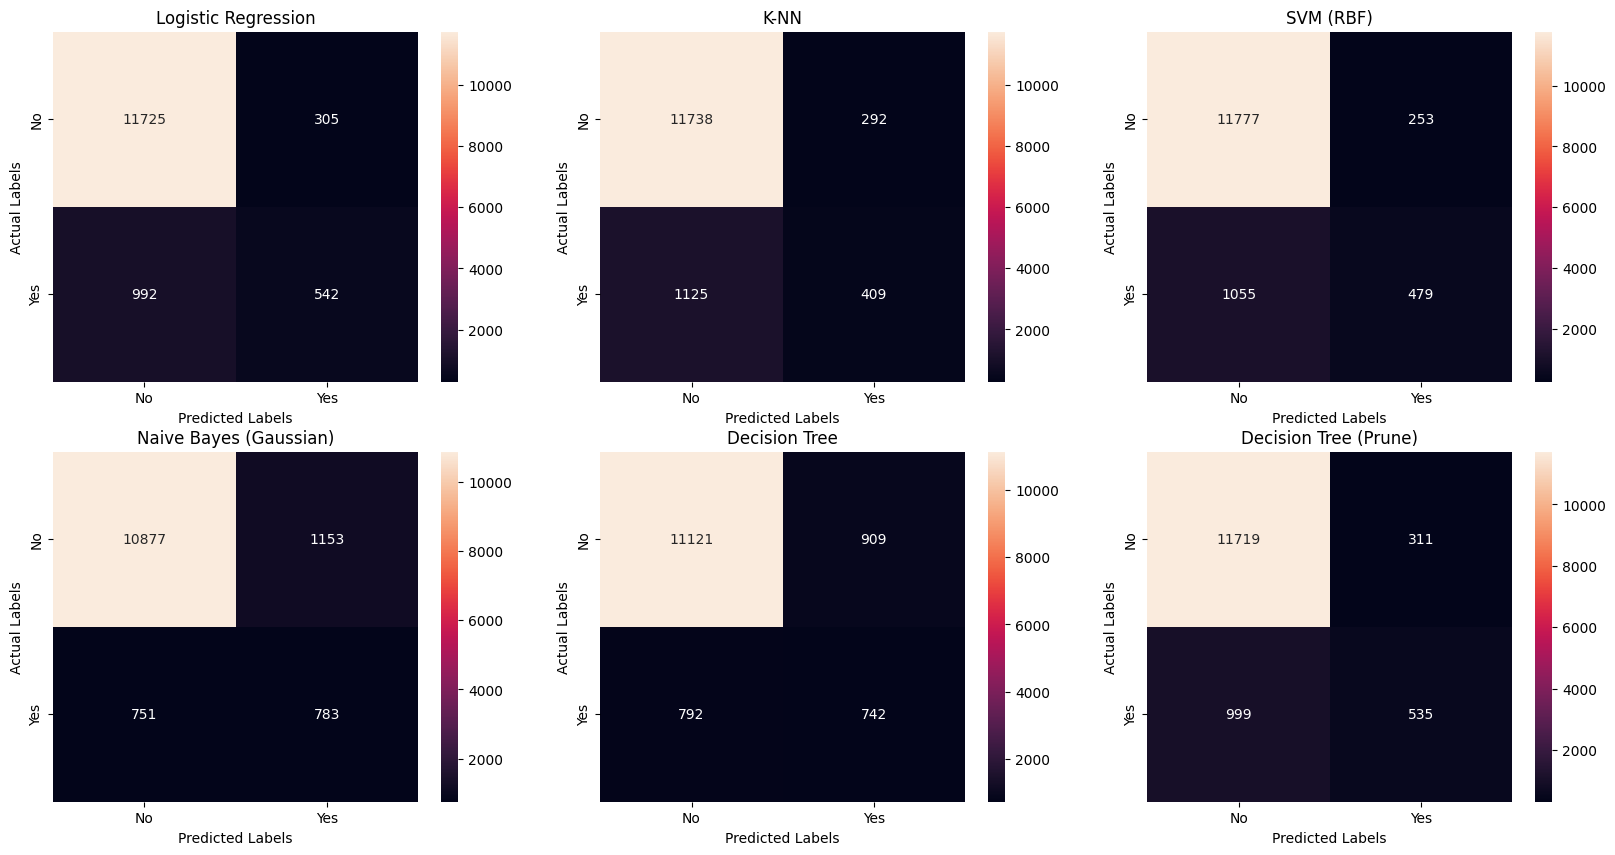

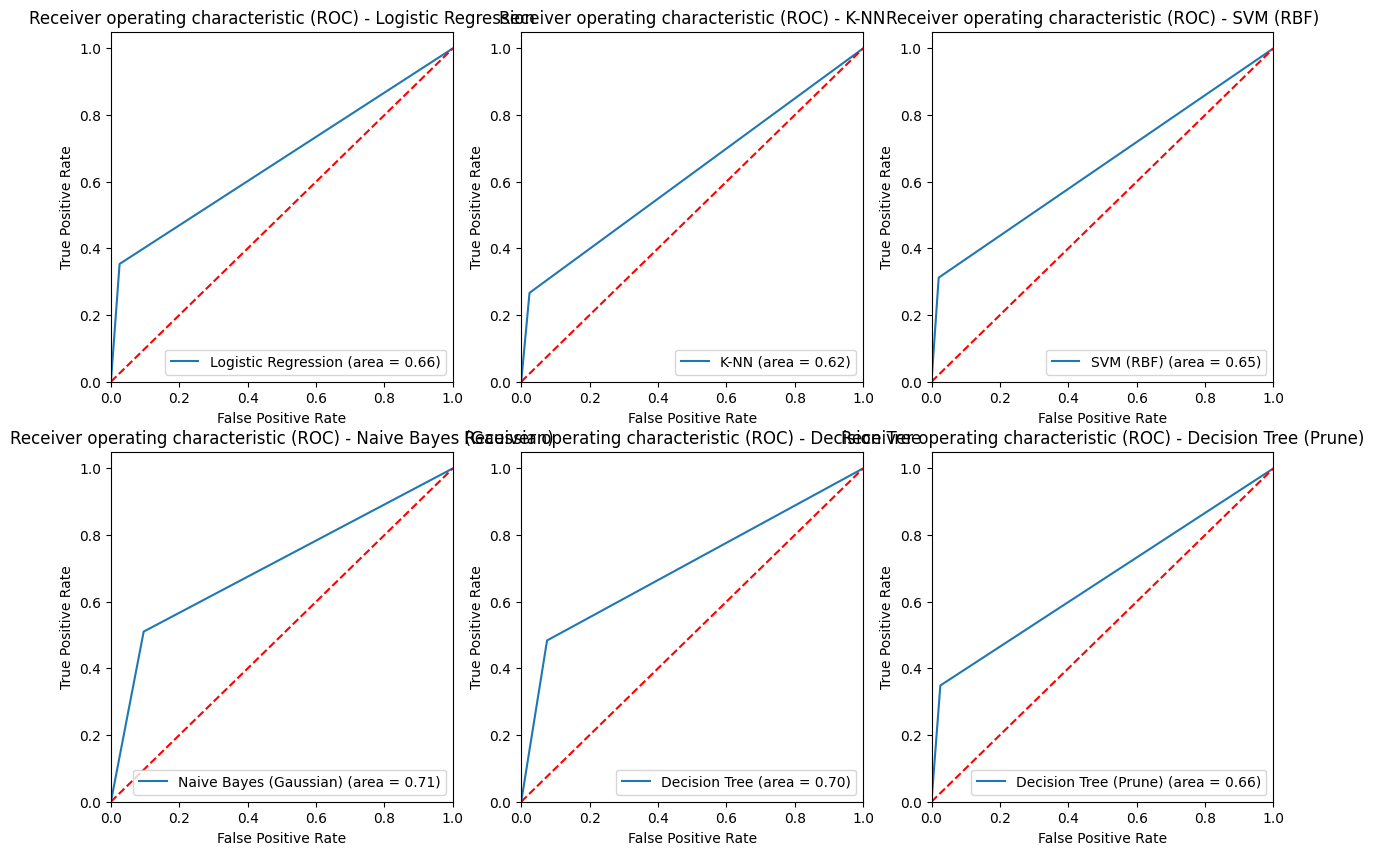

,Model,Accuracy,Precision,Recall,F1 Score,Mean,Std Deviation
0,Logistic Regression,0.904379,0.639906,0.353325,0.455271,0.899644,0.006338
1,K-Nearest Neighbors,0.895532,0.583452,0.266623,0.365996,0.894841,0.005790
2,SVM (RBF),0.903568,0.654372,0.312256,0.422771,0.900181,0.007079
3,Naive Bayes (Gaussian),0.859628,0.404442,0.510430,0.451297,0.857333,0.005185
4,Decision Tree,0.874595,0.449425,0.483703,0.465934,0.872722,0.007167
5,Decision Tree (Pruned),0.903421,0.632388,0.348761,0.449580,0.896894,0.006111


In [54]:
# Confusion Matrix Plots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

models = [
    ('Logistic Regression', LogReg_y_pred),
    ('K-NN', Knn_y_pred),
    ('SVM (RBF)', Svm_y_pred),
    ('Naive Bayes (Gaussian)', GNB_y_pred),
    ('Decision Tree', dTree_y_pred),
    ('Decision Tree (Prune)', dTreePR_y_pred)
]

for i, (model_name, y_pred) in enumerate(models, start=0):
    cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index=["No", "Yes"], columns=["No", "Yes"])
    ax = axs[i // 3, i % 3]
    sns.heatmap(df_cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('Actual Labels')
    ax.set_title(model_name)

# ROC Graphs
fig1_graph = plt.figure(figsize=(15, 10))
for i, (model_name, y_pred) in enumerate(models, start=1):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.roc_auc_score(y_test, y_pred)
    ax = fig1_graph.add_subplot(2, 3, i)
    ax.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'r--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'Receiver operating characteristic (ROC) - {model_name}')
    ax.legend(loc="lower right")

plt.show()

base_model_results

Based on the analysis of confusion matrices, ROC curves, and the accuracy table, it is evident that Decision Tree and Logistic Regression achieved the highest accuracy while maintaining lower runtime and displaying greater stability in their results.
